In [1]:
#Project: Finding the Ca atoms those are located less than 6 Angstrom from residue 1.
#03/25/2017 : Protein data bank file = 1snc.pdb
#08/21/2021 : Protein dta bank file = pdb4hhb.pdb

In [2]:
import os
import re
import math
import subprocess
import numpy as np
import pandas as pd
from biopandas.pdb import PandasPdb

In [3]:
#ppdb = PandasPdb().fetch_pdb('pdb4hhb')

In [4]:
#ppdb.read_pdb('pdb4hhb.pdb')

In [5]:
#print(ppdb.pdb_text)

The .pdb file contains unstructured data sometimes. We need the cooedinates of CA atoms. To do that I used python regular expression.After looking at the file, I made a python list by picking those lines where "ATOM" and "CA" are common.

In [6]:
list1 = []
#file = open("1snc.pdb", "r")
file = open("pdb4hhb.pdb", "r")
for line in file:
    if re.search("ATOM", line) and re.search("CA", line):
        x=line.split()  #This line slpits every line into individual strings.
        list1.append(x)

Now we can make a pandas dataframe from the list

In [7]:
df=pd.DataFrame(list1)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,CAVEAT,4HHB,THR,A,137,HAS,WRONG,CHIRALITY,AT,ATOM,CB,THR,B,12,HAS,WRONG,None
1,CAVEAT,2,4HHB,CHIRALITY,AT,ATOM,CB,THR,B,50,HAS,WRONG,CHIRALITY,AT,ATOM,None,None
2,CAVEAT,3,4HHB,CB,ASN,C,78,HAS,WRONG,CHIRALITY,AT,ATOM,CA,THR,C,118,HAS
3,CAVEAT,4,4HHB,WRONG,CHIRALITY,AT,ATOM,CB,HIS,D,2,HAS,WRONG,CHIRALITY,AT,None,None
4,CAVEAT,5,4HHB,ATOM,CA,SER,D,72,HAS,WRONG,CHIRALITY,AT,ATOM,CA,ASP,D,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,ATOM,4342,CA,ALA,D,142,-1.439,-12.718,-10.054,1.00,17.21,C,None,None,None,None,None
578,ATOM,4347,CA,HIS,D,143,0.079,-16.200,-9.518,1.00,26.63,C,None,None,None,None,None
579,ATOM,4357,CA,LYS,D,144,1.442,-16.574,-13.172,1.00,33.94,C,None,None,None,None,None
580,ATOM,4366,CA,TYR,D,145,3.207,-13.372,-13.244,1.00,29.13,C,None,None,None,None,None


In [9]:
df[0].value_counts()

ATOM      574
CAVEAT      7
REMARK      1
Name: 0, dtype: int64

Notice that the first column has three strings "ATOM", "COVEAT", "REMARK". In the .pdb file the first column must have "ATOM". So we need to remove rows that contains "COVEAT" and "REMARK" in the first column.

In [10]:
index=df[df[0]=='CAVEAT'].index


In [11]:
df.drop(index,inplace=True) #droping rows that contains "CAVEAT"
df.reset_index(drop=True) #index resetting

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,REMARK,500,SYMMETRY,ARE,IN,CLOSE,CONTACT.,AN,ATOM,LOCATED,WITHIN,0.15,None,None,None,None,None
1,ATOM,2,CA,VAL,A,1,6.913,17.759,4.607,1.00,43.14,C,None,None,None,None,None
2,ATOM,9,CA,LEU,A,2,10.600,17.889,4.283,1.00,26.32,C,None,None,None,None,None
3,ATOM,17,CA,SER,A,3,12.263,19.871,7.087,1.00,26.03,C,None,None,None,None,None
4,ATOM,23,CA,PRO,A,4,15.048,21.890,6.206,1.00,38.81,C,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,ATOM,4342,CA,ALA,D,142,-1.439,-12.718,-10.054,1.00,17.21,C,None,None,None,None,None
571,ATOM,4347,CA,HIS,D,143,0.079,-16.200,-9.518,1.00,26.63,C,None,None,None,None,None
572,ATOM,4357,CA,LYS,D,144,1.442,-16.574,-13.172,1.00,33.94,C,None,None,None,None,None
573,ATOM,4366,CA,TYR,D,145,3.207,-13.372,-13.244,1.00,29.13,C,None,None,None,None,None


In [12]:
index=df[df[0]=='REMARK'].index

In [13]:
df.drop(index,inplace=True)

In [14]:
df=df.reset_index(drop=True)

In [15]:
#df[3].value_counts()

In [16]:
#df.groupby([0,2,3]).describe()

Here I drop columns those are not important

In [17]:
df=df.drop(columns=[1,4,5,9,10,11,12,13,14,15,16])

In [18]:
df

,0,2,3,6,7,8
0,ATOM,CA,VAL,6.913,17.759,4.607
1,ATOM,CA,LEU,10.600,17.889,4.283
2,ATOM,CA,SER,12.263,19.871,7.087
3,ATOM,CA,PRO,15.048,21.890,6.206
4,ATOM,CA,ALA,17.552,19.622,7.588
...,...,...,...,...,...,...
569,ATOM,CA,ALA,-1.439,-12.718,-10.054
570,ATOM,CA,HIS,0.079,-16.200,-9.518
571,ATOM,CA,LYS,1.442,-16.574,-13.172
572,ATOM,CA,TYR,3.207,-13.372,-13.244


In [19]:
df.columns=['Col','type','name','x','y','z'] #giving column name

In [20]:
df.name.value_counts()

LEU    72
ALA    72
VAL    62
LYS    44
GLY    40
HIS    38
SER    32
THR    32
PHE    30
ASP    30
PRO    28
GLU    24
ASN    20
TYR    12
ARG    12
GLN     8
TRP     6
CYS     6
MET     6
Name: name, dtype: int64

In [21]:
df

,Col,type,name,x,y,z
0,ATOM,CA,VAL,6.913,17.759,4.607
1,ATOM,CA,LEU,10.600,17.889,4.283
2,ATOM,CA,SER,12.263,19.871,7.087
3,ATOM,CA,PRO,15.048,21.890,6.206
4,ATOM,CA,ALA,17.552,19.622,7.588
...,...,...,...,...,...,...
569,ATOM,CA,ALA,-1.439,-12.718,-10.054
570,ATOM,CA,HIS,0.079,-16.200,-9.518
571,ATOM,CA,LYS,1.442,-16.574,-13.172
572,ATOM,CA,TYR,3.207,-13.372,-13.244


In [22]:
df.dtypes

Col     object
type    object
name    object
x       object
y       object
z       object
dtype: object

Coordinates X, Y, Z are object type. Need to convert into float type

In [23]:
df[['x', 'y','z']] = df[['x', 'y','z']].apply(pd.to_numeric)

In [24]:
len(df)

574

In [25]:
df.dtypes

Col      object
type     object
name     object
x       float64
y       float64
z       float64
dtype: object

Doing the calculation described in the problem, and storing the output in a dataframe.

In [26]:
list0=[]
for j in range (1,len(df),1):
    for i in range (1,len(df),1):
        #dist=math.sqrt((df['x'][j]-df['x'][i])**2  +  (df['y'][j]-df['y'][i])**2 + (df['z'][j]-df['z'][i])**2)
        dist=math.sqrt((df.x[j]-df.x[i])**2  +  (df.y[j]-df.y[i])**2 + (df.z[j]-df.z[i])**2)
        if dist<=6.0:
            list0.append([i,j])
newdf=pd.DataFrame(list0)

In [27]:
newdf.columns=['Residue i','Residue j']

In [28]:
import matplotlib.pyplot as plt

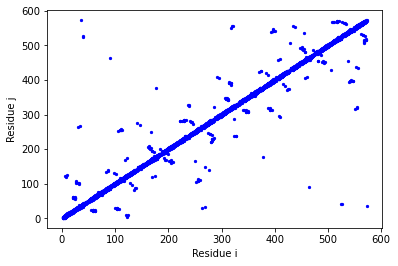

In [29]:
newdf.plot.scatter(x='Residue i',y='Residue j',color='blue',marker=".")
plt.show()